<a href="https://colab.research.google.com/github/Anupamashetty27/django/blob/main/StableDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text-to-Image Generation using Stable Diffusion and Diffusers

In this notebook we shall learn

* how to generate images using text prompts
* the various diffusion pipelines for tasks such as text-to-image, image-to-image, text-to-music
* primary components of the diffusion pipeline: UNet model and schedulers

Diffusers library (HuggingFace): enables using SoTA diffusion models for generating images, audio, 3D structures of molecules

* Diffusion Pipeline wraps the complexity of the entire diffusion system into easy to use API

In [1]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers gradio accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [3]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [4]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

In [6]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans



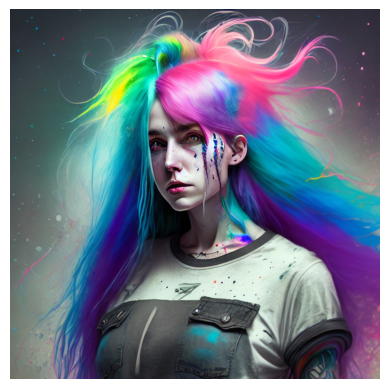

In [7]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [8]:
prompt2 = """dreamlike, Goddess Durga coming down from the heaven with a weapon in one hand and other hand in the pose of blessing. Anger and divine energy
reflecting from her eyes.
She is in the form of a soldier and savior coming to protect the world from misery. She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  dreamlike, Goddess Durga coming down from the heaven with a weapon in one hand and other hand in the pose of blessing. Anger and divine energy
reflecting from her eyes.
She is in the form of a soldier and savior coming to protect the world from misery. She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris



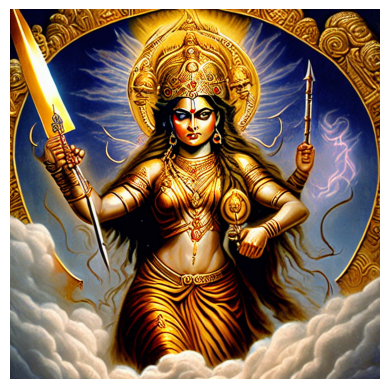

In [9]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

https://huggingface.co/docs/diffusers/using-diffusers/loading

### Working with Stable Diffusion parameters

* Negative prompting
* num_inference_steps
* height
* weight
* num_images_per_prompt

In [10]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [11]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

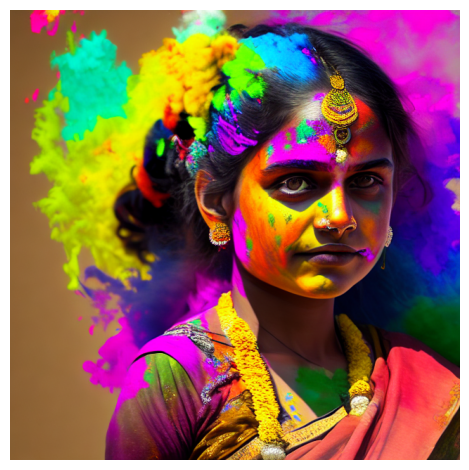

In [12]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

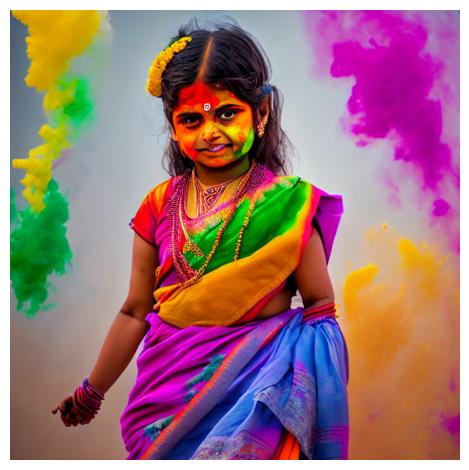

In [13]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

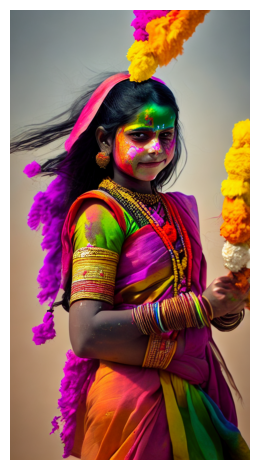

In [14]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

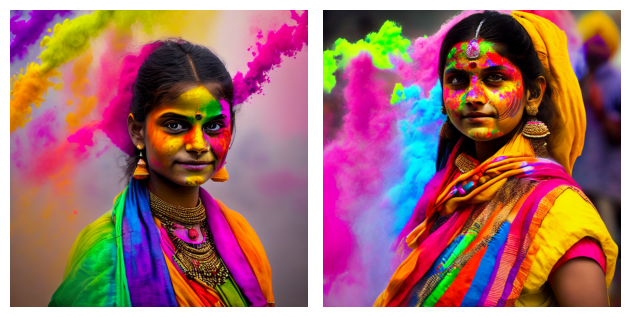

In [15]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

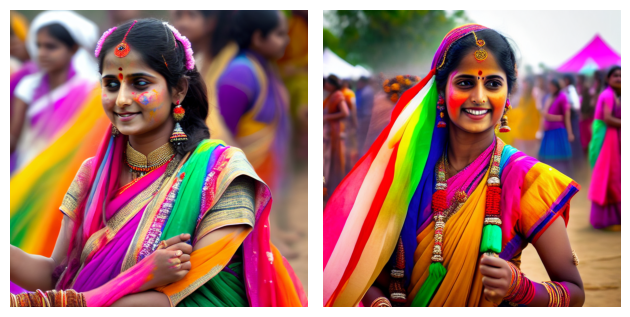

In [16]:
# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

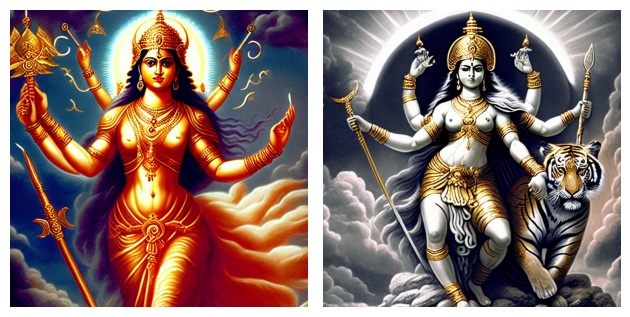

In [17]:
generate_image(pipe, prompt2, params)

### Creating an interface

In [18]:
def generate_image_interface(prompt, negative_prompt, num_inference_steps=50, weight=640):
  params = {'prompt': prompt, 'num_inference_steps': num_inference_steps, 'num_images_per_prompt':2, 'height':int(1.2*weight),
            'weight': weight, 'negative_prompt': negative_prompt}

  img = pipe(**params).images
  return img[0],img[1]

In [19]:
import gradio as gr

In [20]:
demo = gr.Interface(generate_image_interface, inputs=["text","text",gr.Slider(1,100),gr.Slider(512,640)], outputs=["image","image"])

In [21]:
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://be6db2f4ed22a9c43c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Understanding diffusion models

Diffusion models have beaten GANs in image generation

2 primary components

* UNet model: takes a random noise to generate the noise residual
* Scheduler: uses the noise residual to generate a less noisy image

Pipelines such as Stable diffusion, use additional component (tokenizers) to convert the prompt to embeddings